***
# &nbsp;
<font size="6" color="#00A0B2"  face="verdana"> <B>Loan Prediction</B></font>
***

### Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). 

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

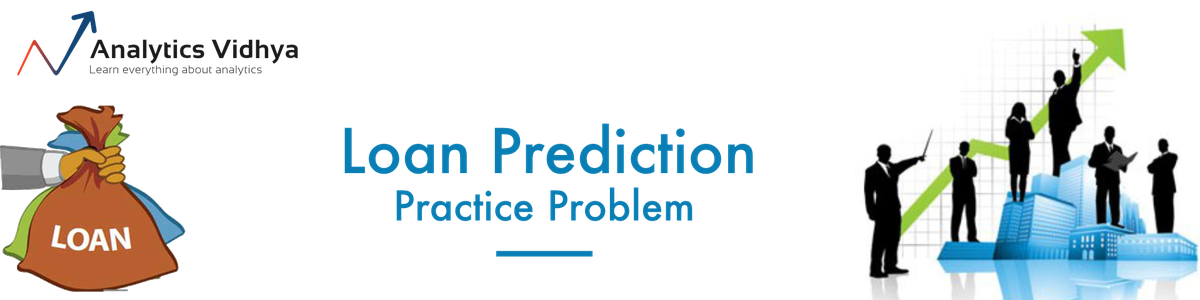

In [23]:
#Load and show an image with Pillow
from PIL import Image

#Load the image
img = Image.open('C:\\Users\\NEONARD\\Documents\\python files\\images\\loan.png')

#show the image

# Loading image inline using PIL display() loads the image inline
display(img)

#### Data Dictionary/about dataset
The train and test dataset  have the same columns except for the target column that is “Loan Status”.

| Variable     | Description |
| -----------  | ---: |
|Loan_ID|	Unique Loan ID|
|Gender|	Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents|	Number of dependents|
|Education|	Applicant Education (Graduate/Under Graduate)|
|Self_Employed|	Self employed (Y/N)|
|ApplicantIncome|	Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands|
|Loan_Amount_Term|	Term of loan in months|
|Credit_History|	Credit history meets guidelines|
|Property_Area|	Urban/ Semi Urban/ Rural|
|Loan_Status|	Loan approved (Y/N)|

As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.
Loan status can have two values: Yes or NO.
- Yes: if the loan is approved
- NO: if the loan is not approved

So using the training dataset we will train our model and try to predict our target column that is “Loan Status” on the test dataset.

After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing all the possible factors that affects the outcome.

#### What is hypothesis generation?

This is a very importanbt stage in any data science or machine learning pipeline. it involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. it is done by understanding the problem statement thoroughly and before looking at the data.
 
Below are some of the factors which i think can affect Loan approval(dependent variable for this loan prediction problem).
- salary: Apllicants with high income should have more chances of loan approval
- previous history: Applicants who have repayed their previous debt should have high er chances of loan approval
- Loan Amount: Loan approval should also depend on loan amount. if the loan amount is low, the chances of loan approval should be high
- Load terms: loan for less time period and less amount should should have higher chances of approval.
- EMI: lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval

#### load librairies

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



rcParams['figure.figsize'] = 12,6
sns.set_style('whitegrid')

In [25]:
##Load Training/Test datasets

train = pd.read_csv("C:/Users/NEONARD/Documents/python files/data/loan prediction/train_ctrUa4K.csv")
test  = pd.read_csv("C:/Users/NEONARD/Documents/python files/data/loan prediction/test_lAUu6dG.csv")

In [26]:
# make a copy of train and test for safety

train_original = train.copy()
test_original  = test.copy()

### understanding the data / Exploratory data analysis (EDA).

In this section, we will look at the structure of the train and test datasets. First we will check the features present in our dataset and the data types

In [27]:
# view the first few records

print('# of records/rows in dataframe: ' + str(len(train.index)) + '\n')
print('# of features/columns in dataframe: ' + str(len(train.keys())) + '\n')
train.head()

# of records/rows in dataframe: 614

# of features/columns in dataframe: 13



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
test.head()

# N.B: test dataset does not contain target variable (Loan_Status), why?

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [29]:
# check the column headers

df_columns = list(train.columns)
print(df_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [30]:
# look at the shape of the dataframes

train.shape, test.shape

((614, 13), (367, 12))

we have 614 rows and 13 columns in train dataset and 367 and 12 columns in test dataset. This is very important for the fact when the two data will be combine later, the number of records with change to the sum of the two.

In [31]:
#What are the data types for various features?

train.dtypes

#•	Eight features are strings or objects. 
#•	five features are integer or floats numbers.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [32]:
# basic info on train dataset

train.info()
print('_'*60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
____________________________________________________________


observations:
- There appear to be some missing values in the following columns since the number of records are less than the max (614); Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History. This will be treated later on inour analysis.

In [33]:
# which features are numeric data

num_df = train.select_dtypes(include=['float', 'int64']).copy()
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


Numerical Features:
- ApplicantIncome
- CoapplicantIncome	
- LoanAmount	
- Loan_Amount_Term
- Credit_History

In [34]:
# Which features are categorical?

cat_df = train.select_dtypes(include=['object']).copy()
cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


Categorical features:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- Property_Area
- Loan_Status

## Exploratory Data Analysis (EDA) 

### Univariate Analysis
In this section, we will do univariate analysis. it is the simplest form of analyzing data where we examine each variable invidually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

***Target Variable (Loan_Status)***

We will first look at the target variable, i.e Loan_status.. As a categorical variable, let us look at its frequency table, percentage distrubution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [35]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [36]:
# Normalize can be set to True to print proportions instead of numbers

train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

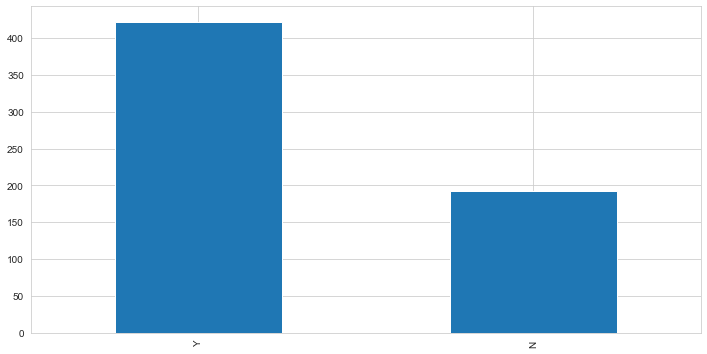

In [37]:
# plot the distribution of Loan_Status

train['Loan_Status'].value_counts().plot.bar()

Observation:
The loan of 422(around 69%) people out of 614 was approved.

Now, lets visualize each variable separately. Different types of variable are categorical, ordinal and numerical.

- Categorical features: These features have categories (Gender, married, Self_Employed, Credit_History, Loan_Status)
- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_area)
- Numerical Featues: these features have numerical values (Applicationincome, Coapplicantincome, LoanAmount,Loan_Amount_Term)

Let's visualize the categorical and ordinal features first.


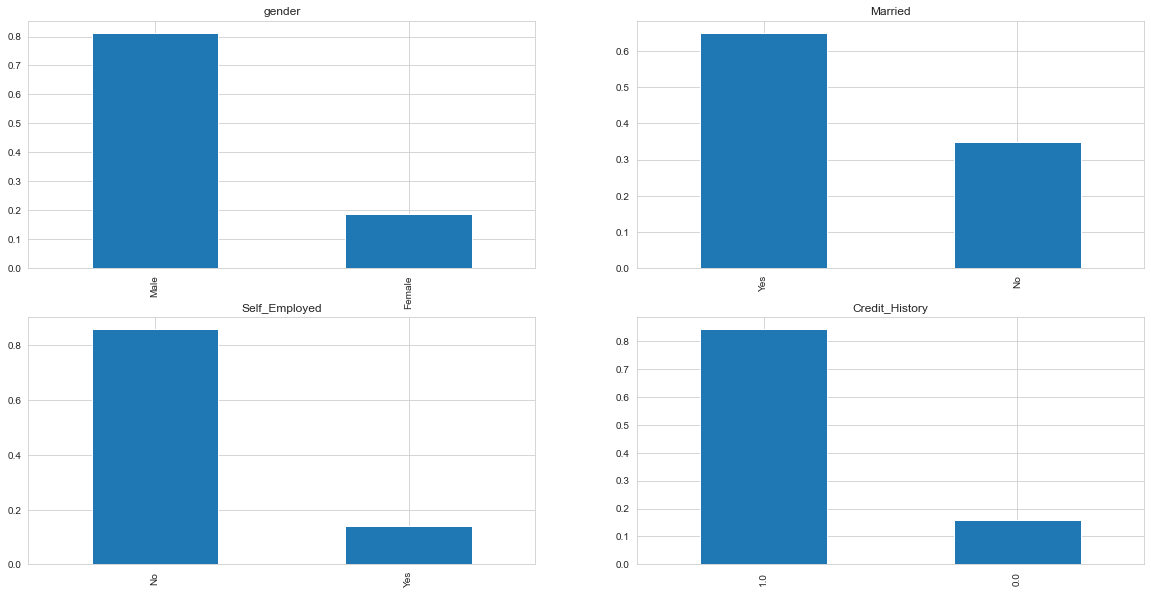

In [38]:
# Independent Variable (Categorical)

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), 
                                                      title="gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")
plt.show()

observations:
- 80% applicants in the dataset are male
- around 65% applicants in the dataset are married
- around 15% applicants in the dataset are self_employed
- around 85% applicants have repaid their debts

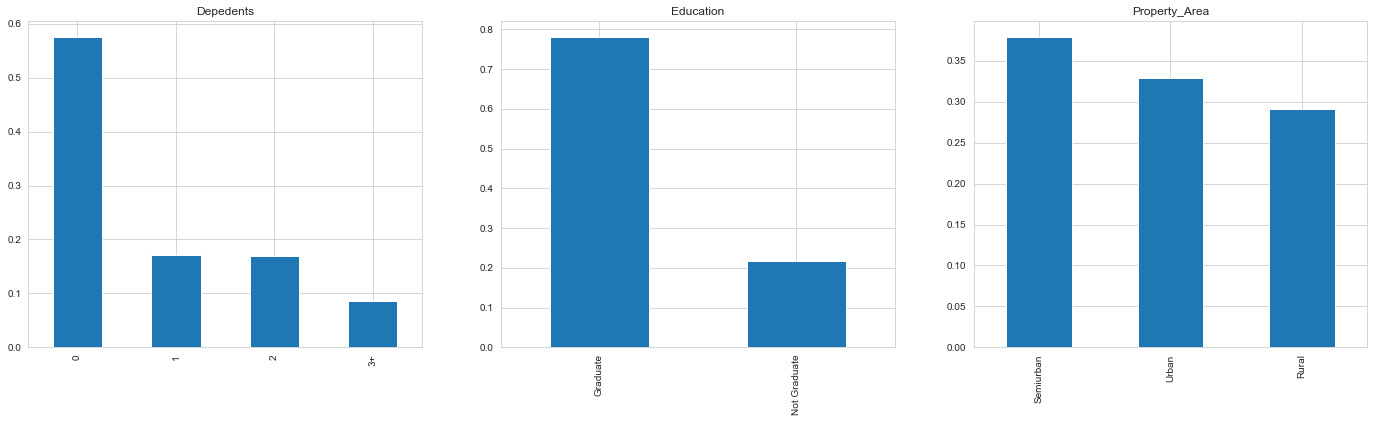

In [39]:
# Independent variable (Ordinal)

plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),
                                                         title='Depedents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

observations:
- Most of the applicants don't have any dependents
- Around 80% of the applicants are Graduate
- Most of the applicants are from SemiUrban area

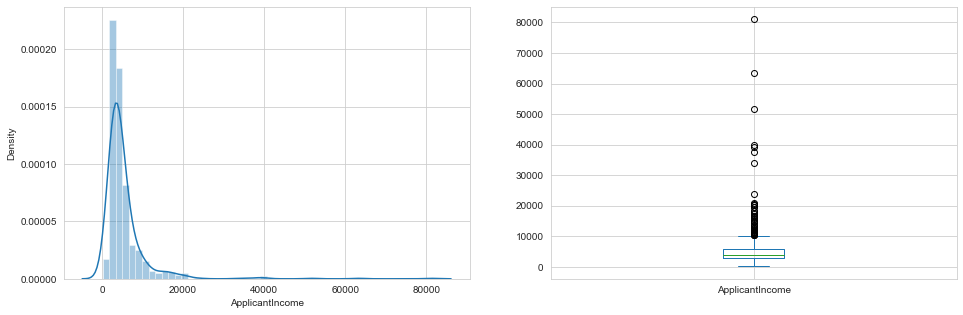

In [40]:
## Independent Variable (Numerical)

'''
Lets look at the distribution of Applicant income first
'''

plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)

train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

observation:
it can be inferred  that most of the data in the distribution of applicant income is towards left which means it is not normally distributed (right_skewed). We will normalize it later on since most of the machine learning algorithms work best of the data is normally distributed.

The boxplot confirms the presence of a lot of outloers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by education:

Text(0.5, 0.98, '')

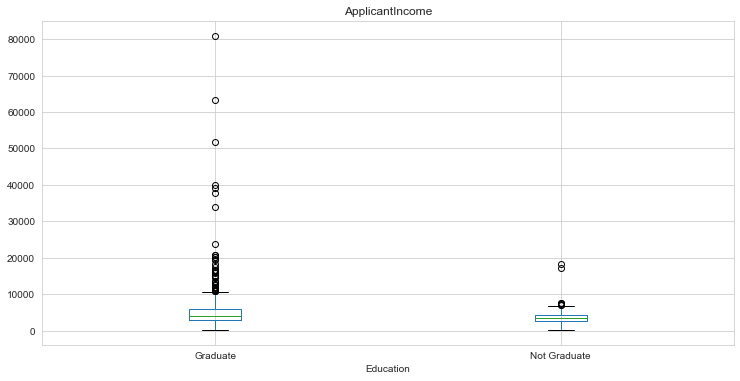

In [41]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

Observation:

we can see that there are a higher number of graduates with very high incomes, which are appearing to e the outliers.

Let's look at the Coapplicant income distribution

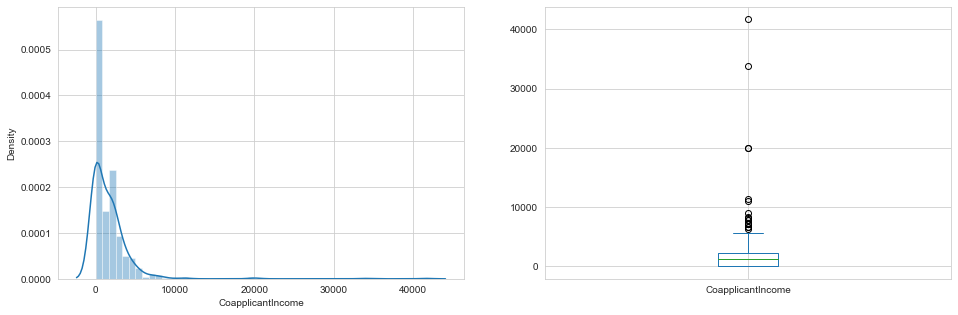

In [42]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

we see a similar distribution as that of applicant income. Mojority of the coapllicant's income ranges from 0 to 5000. we also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let's look at the distribution of LoanAmount variable.

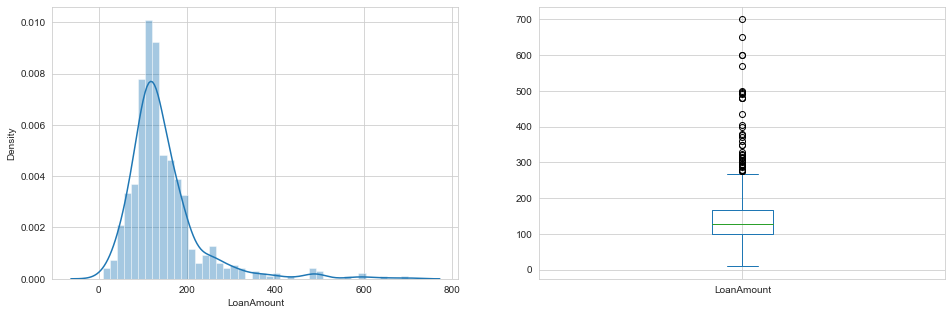

In [43]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

we see alot of outliers in this variable and the distribution is fairly normal. we will treat the outliers in later sections.

Now we would like to know how well each feature correlate with Loan status.

### Bivariate Analysis

Let's recall some of the hypotheses that we generated earlier on:
- Applicants with high income should have more chances of loan approoval
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval shou;d also depend on the loan amount. if the loan amount is less, chances of loan approval should be high.
- lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis.

After looking at every variable individually in univariate analysis, we will now explore tham again with respect to the target variable.

#### Categorical Independent Variable Vs Target Variable
First of all we will find the relation between target variable and categorical indepndent variables. let us look at the stack bar plot now which will give us the proportion of approved and unapproved loans.

<AxesSubplot:xlabel='Gender'>

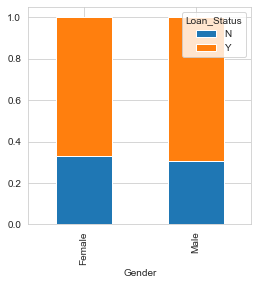

In [44]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", 
                                                    stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved.

Now let us visualize the remaining categorical variables Vs target variable.

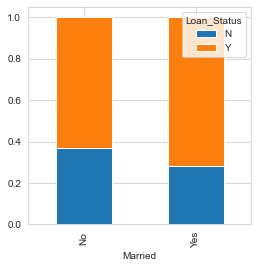

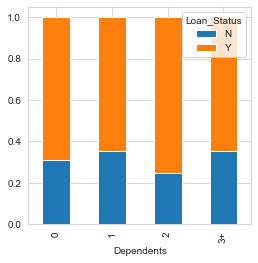

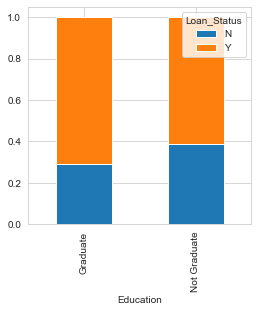

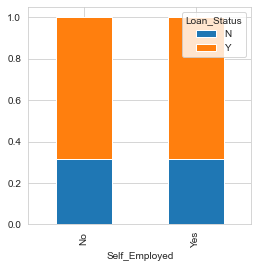

In [45]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",
                                                     stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",
                                                     stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",
                                                     stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",
                                                     stacked=True,figsize=(4,4))
plt.show()

- Proportion of married applicants is higher for approved loans
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
- There is nothing significant we can infer from Self_Employed Vr Loan Status plot.

Now we will look at the relationship between remanining categorical independent variables and Loan_Status

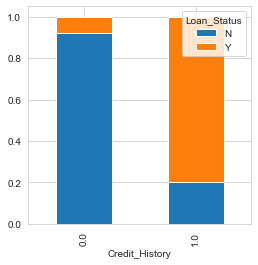

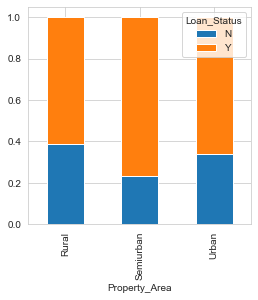

In [46]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",
                                                                    stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",
                                                                    stacked=True, figsize=(4,4))
plt.show()

- It seems people with credit history as 1 are more likely to  get their Loan approved.
- Proportion of loans getting approved in semiurban area is higher as compared to taht in rural areas

Now let's visualize numerical independent variables with respect to target variable.

#### Numerical Independent variable Vs Target variable
We will try to find the mean income of people for which the laon has been approved Vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

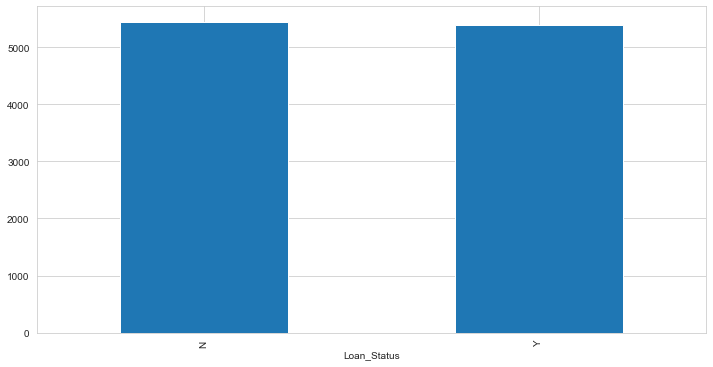

In [47]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. we don't see any cjange in the mean income. so, let's make bins for the apllicant income variable based on the values in it and analyze the corresponding loan status for each bin.

Text(0, 0.5, 'Percentage')

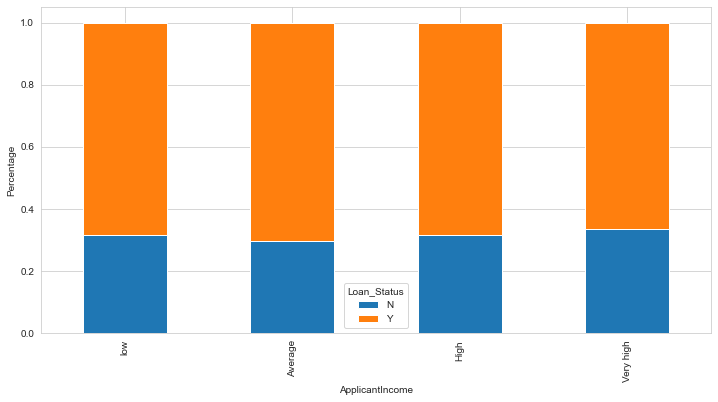

In [48]:
bins = [0, 2500, 4000, 6000, 81000]
group = ["low", "Average","High","Very high"]
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',
                                                           stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of laon approval will also be high.

We will analyze the coapplicant income and loan amount in similar manner

Text(0, 0.5, 'Percentage')

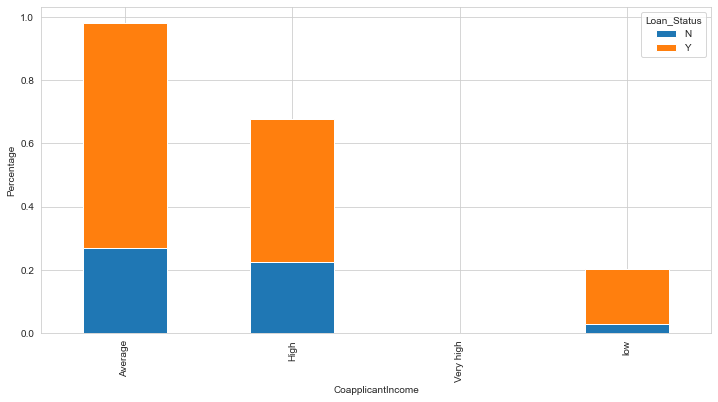

In [49]:
bins = [0, 1000, 3000, 42000]
group = ["low", "Average","High"]
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',
                                                           stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant's income is less the chances of loans approval are hig. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such appliacnts is 0 and hence the loan approval is not dependnet on it. So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

Let us comine the applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

Text(0, 0.5, 'Percentage')

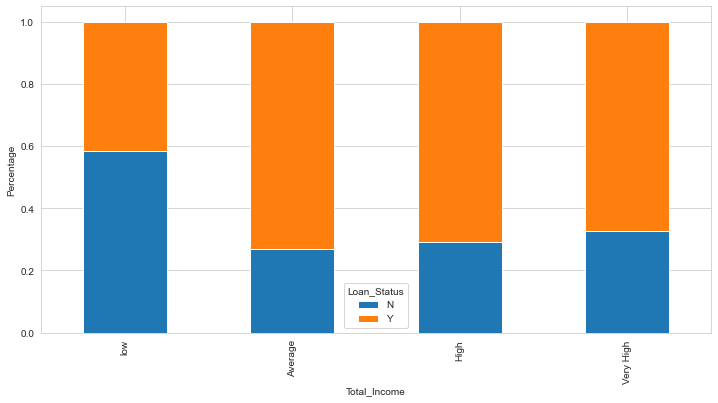

In [50]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ["low", "Average","High","Very High"]
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',
                                                           stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

we can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and very High Income.

let's Visualize the Loan Amount variabele.

Text(0, 0.5, 'Percentage')

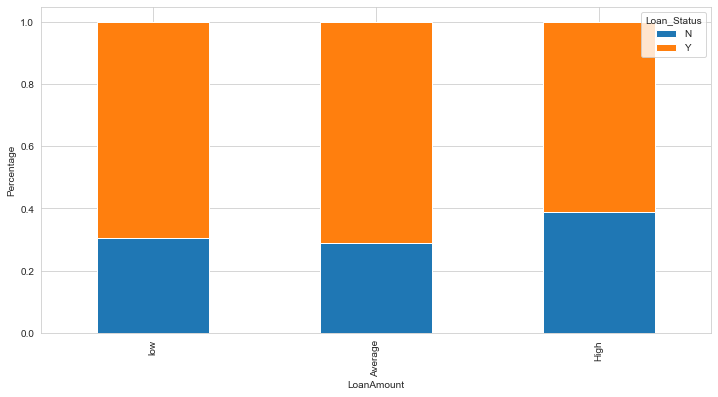

In [51]:
bins = [0,100,200,700]
group = ["low", "Average","High"]
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',
                                                           stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for low and average Loan Amount as compared to that of High Loan Maount which supports our hypothesis in which we considered that  the chances of loan approval will be high when the loan amount is less.

Let's drop the bins which we created for the exploration part. We will change the 3+ in the dependents variable to 3 to make it numerical variable. We will also convert the target variable's categoroes into 0 and 1 so that we can find its correlation with numerical variables. One more reaon to do so is few models like logistic regression take only numerical values as input. We will replace N with 0 and Y with 1. 

Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe ```data``` with a ```source``` column specifying where each observation belongs.

In [52]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin',
                    'LoanAmount_bin', 'Total_Income_bin' , 'Total_Income'], 
                   axis=1)

### Data Preprocessing

In [53]:
# merge train and test to ease the cleaning process

train['source'] = 'train'
test['source'] = 'test'
test['Loan_Status'] = 0      # impute o in sales column in test dataset to avoid nan values
data = pd.concat([train, test], sort = False)
print(df.shape, test.shape, data.shape)

(480, 13) (367, 14) (981, 14)


In [54]:
data['Loan_Status'].replace('N', 0, inplace=True)
data['Loan_Status'].replace('Y', 1, inplace=True)

Now lets look at the correlation between all the numerical variables. we will use the heat map to visualize the correlation. heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<AxesSubplot:>

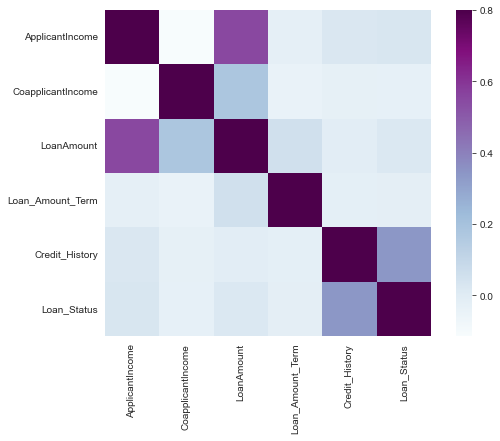

In [55]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

We see that the most correlated variables are (ApplicantIncome- LoanAmount) and (Credit_History-LoanAmount). Loanamount is also correlated with CoapplicantIncome

#### Missing Values and Outliers treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [56]:
## Missing Value imputation
'''
Let's list out feature-wise count of missing values
'''

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
source                0
dtype: int64

In [57]:
# Create table for missing data analysis

def draw_missing_data_table(df):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing[missing['Total']>0]   # missing values greater than 0
    return missing_data

In [58]:
draw_missing_data_table(data)

,Total,Percent
Credit_History,79,8.053007
Self_Employed,55,5.606524
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810


In [59]:
#Assess Missing Data in each column or features

def bar_plot_missing_val(df,title=None,x_label=None, y_label=None,kind = 'bar'):
    '''Plot a bar chart of missing values in a dataframe'''
    a = df.isnull().sum()/len(df)
    a.plot(title=title,x =x_label, y=y_label,kind=kind)

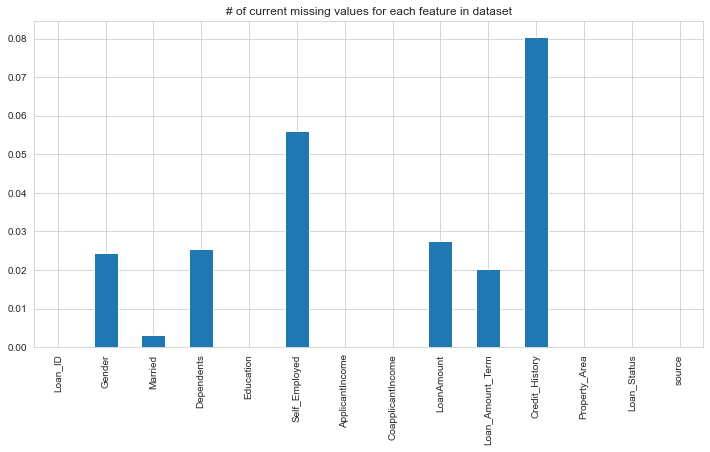

In [60]:
# Check how much missing data are currently in each column of the dataset
bar_plot_missing_val(data,'# of current missing values for each feature in dataset', 'Features','# Missing values')

There are missing values in gender (2.4%), Married(0.3%), Dependents(2.5%), Self_Employed(5.6%), LoanAmount(2.75%), Loan_Amount_Term(2%) and Credit_History features(8.05%).

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:
- ***For Numerical variable***: imputation using mean or median
- ***Categorical Variables***: imputation using mode

There are less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode features.

In [61]:
# replace missing values with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

Now let's try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the loan amount term variable.

In [62]:
data['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the values of 360 is repeated the most. so we will replace the missing values in this variable using the mode of this variable

In [63]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median ti impute the missing values. We will use median to fill the null values as earlier we saw affected by the presence of outliers

In [64]:
data['LoanAmount'].fillna(data["LoanAmount"].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset

In [65]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
source               0
dtype: int64

As we can see that all the missing Values have been filled in the dataset. 

#### Outlier Treatment

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is call right skewedness. One way to remove the skewedness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. so, we get a distribution similar to normal distribution.

Let's visualize the effect of log transformation. 

<AxesSubplot:>

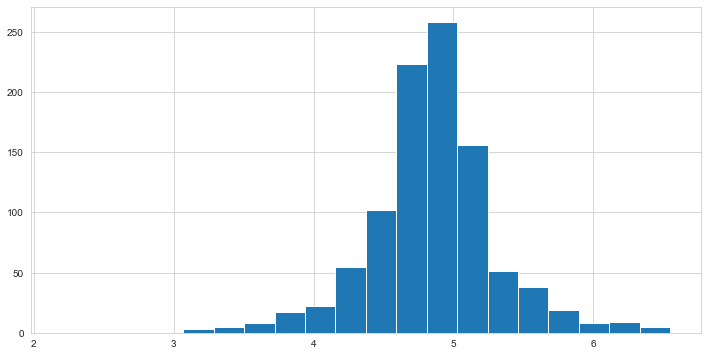

In [66]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

data['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a logistic regresion model and make predictions for the test dataset.

### Feature Engineering

In [67]:
# drop Loan_ID 
data = data.drop('Loan_ID', axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

To learn further about sklearn, refer here: http://scikit-learn.org/stable/tutorial/index.html

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [68]:
#Divide into test and train:
train = data.loc[data['source']=="train"]  # select data where source is equal to train (ie select all data in dataset 
                                           # where source feature is equal train
test = data.loc[data['source']=="test"]   # select data where source is equal to test (ie select all data in dataset 
                                           # where source feature is equal to test

In [69]:
#Drop unnecessary columns:
test.drop(['Loan_Status','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [70]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)   # predictor variables
y = train.Loan_Status   # target variable

In [71]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)

# test = pd.get_dummies(test)

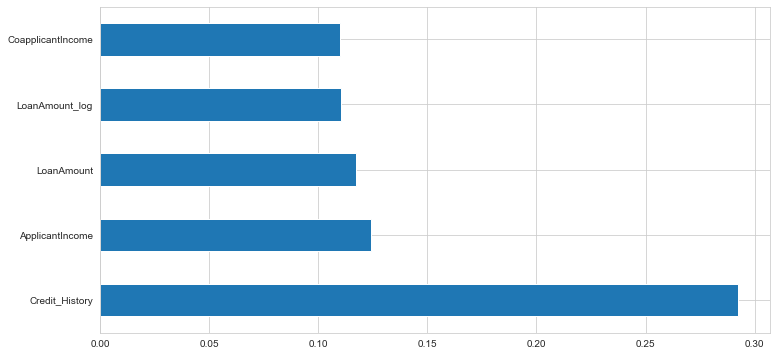

In [72]:
# visualizing feature importances
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

# To look at the best features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

observation:
- we can see from the figure above the most important feature in this analysis is Credit_History

In [73]:
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 12))

In [74]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,4.836282,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


### Model Development and Evaluation
Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.
- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
- Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
- This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: ```train and validation```. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [75]:
# Machine learning

After completing Data Preprocessing and Feature Transformation, the dataset is now ready to build a predictive 
model. The algorithm is fed into the training set in order to learn how to forecast values. After Model Building a 
target variable to forecast, testing data is supplied as input. The predictive models are built using:
- Logistic regression
- Random Forest
- Decision Tree

In [76]:
#Importing Machine Learning Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn import ensemble
from sklearn.svm import LinearSVC  # SVC stands for support vector classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
#statistical Tools
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [77]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

In [125]:
## 1 Decison Tree
#Building the model using DecisonTree

tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf = 30)
# dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

In [126]:
# Now we will be making the predictions on the testing data directly as it is of more importance.

# Getting the accuracy score for Decision Tree
dtree_pred = dtree.predict(x_cv)
print("Accuracy Score =", format(metrics.accuracy_score(y_cv,dtree_pred)))

Accuracy Score = 0.7837837837837838


In [131]:
# Classification report and confusion matrix of the decision tree model

print("Test Accuracy: ",accuracy_score(y_cv,dtree_pred))
print("Test F1 Score: ",f1_score(y_cv,dtree_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_cv, dtree_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7837837837837838
Test F1 Score:  0.8540145985401459
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,28,23,51
1,17,117,134
All,45,140,185


In [132]:
print("--"*50)
print(classification_report(y_cv,dtree_pred))

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        51
           1       0.84      0.87      0.85       134

    accuracy                           0.78       185
   macro avg       0.73      0.71      0.72       185
weighted avg       0.78      0.78      0.78       185



In [133]:
## 2 Random Forest
#Building the model using RandomForest

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [134]:
# Getting the accuracy score for Random Forest
rfc_pred = rfc.predict(x_cv)
print("Accuracy_Score =", format(metrics.accuracy_score(y_cv, rfc_pred)))

Accuracy_Score = 0.8108108108108109


In [136]:
rfc_pred = rfc.predict(x_cv)
print("Test Accuracy: ",accuracy_score(y_cv,rfc_pred))
print("Test F1 Score: ",f1_score(y_cv,rfc_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_cv, rfc_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8108108108108109
Test F1 Score:  0.8788927335640139
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,23,28,51
1,7,127,134
All,30,155,185


In [138]:
# 3 Logistic regression

# fit the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [139]:
# make prediction
pred_cv = model.predict(x_cv)

In [140]:
# Getting the accuracy score for Logistic Regression
logreg_pred = logreg.predict(x_cv)
print("Accuracy_Score =", format(metrics.accuracy_score(y_cv, logreg_pred)))

Accuracy_Score = 0.8324324324324325


So our predictions are over 83% accurate, i.e. we have identified 83% of the loan status correctly.

In [67]:
#  Visualizing the ROC Curve

#Get predictions of Random Forest and Logistic Regression models in the form of probability values
y_lg_prob = logreg.predict_proba(x_cv)[:,1]
y_rfc_prob = rfc.predict_proba(x_cv)[:,1]

In [68]:
#For Logistic Regression
fpr, tpr, _ = metrics.roc_curve(y_cv,y_lg_prob)
auc = metrics.roc_auc_score(y_cv, y_lg_prob)

In [69]:
#For Logistic Regression
fpr, tpr, _ = metrics.roc_curve(y_cv,y_lg_prob)
auc = metrics.roc_auc_score(y_cv, y_lg_prob)

In [70]:
#For Random Forest
fpr1, tpr1, _1 = metrics.roc_curve(y_cv,y_rfc_prob)
auc1 = metrics.roc_auc_score(y_cv, y_rfc_prob)

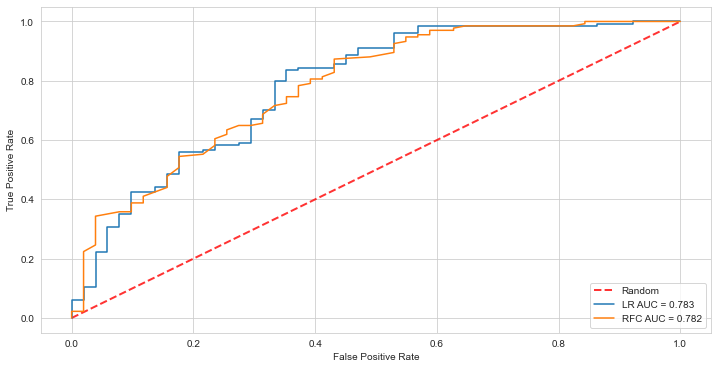

In [71]:
#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr,label="LR AUC = "+str(round(auc,3)))
plt.plot(fpr1,tpr1,label="RFC AUC = "+str(round(auc1,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

We see from the ROC graph that Logistic Regression gives a better preiction than random forest. Therefore, we will use logistics regression to make predictions.

In [73]:
test = pd.get_dummies(test)

In [74]:
# make prediction on test set
pred_test = logreg.predict(test)

In [75]:
# take a look at the prediction
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

Lets import the submission file which we have to submit on the solution checker.

In [76]:
submission = pd.read_csv("C:/Users/NEONARD/Documents/python files/data/loan prediction/sample_submission_49d68Cx.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [77]:
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [78]:
# replace with "N" and "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [79]:
# take a look at the submission result
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [81]:
# convert to CSV file, without row index
submission.to_csv('logistic.csv', index=False)